# Generating tables and figures in Schroeder 3.3 Paramagnetism



We have a two-state paramagnet with $N$ dipoles. The number of dipoles pointing up is $N_\uparrow$.

The total number of states is $2^N$ and the multiplicity of $N_\uparrow$ (i.e., the number of microstates in this macrostate) is
$$
 \Omega(N,N_\uparrow) = \frac{N!}{N_\uparrow! (N-N_\uparrow)!} = \frac{N!}{N_\uparrow! (N-N_\uparrow)!} = {N\choose N_\uparrow} \,.
$$

In [1]:
import numpy as np
import math
from scipy.special import comb
import matplotlib.pyplot as plt

In [2]:
def para_energy_over_muB(N, Nup):
    """
    Calculate the energy of a 2-state paramagnet
    """
    return N - 2 * Nup

In [3]:
def para_magnetization_over_mu(N, Nup):
    """
    Calculate the magnetization of a 2-state paramagnet
    """
    Ndown = N - Nup
    return (Nup - Ndown) / N

In [4]:
def para_mult(N, Nup):
    """
    Calculate the 2-state paramagnet multiplicity and return it as
     an integer.
    """
    return int(comb(N, Nup))  

In [5]:
def para_entropy_over_k(N, Nup):
    """
    Calculate the 2-state paramagnet entropy divided by k (so just the
      ln of the multiplicity).
    """
    return np.log(np.float64(para_mult(N,Nup)))  

In [6]:
def convert_int(my_int, large=10**6):
    """
    If my_int is larger than large, return an exponential form.
      The right justification for ints should be log10(large) + 1.
    """
    if my_int > large:
        return "{: .1e}".format(my_int)
    else:
        return "{:>8}".format(my_int)

In [7]:
def round_to_n(num, sigfigs):
    """
    Round off num to the specifie number of sigfigs (significant figures)
    """
    if num == 0:
        return num
    else:
        return round(num, -int(math.floor(math.log10(abs(num)))) + (sigfigs - 1))
    

In [8]:
def central_diff(array1, array2, index):
    """
    Calculate the derivative of array at index by central difference
    """
    return (array1[index + 1] - array1[index - 1]) / \
           (array2[index + 1] - array2[index - 1])

In [9]:
def forward_diff(array1, array2, index):
    """
    Calculate the derivative of array at index by forward difference
    """
    return (array1[index + 1] - array1[index]) / \
           (array2[index + 1] - array2[index])

In [10]:
def backward_diff(array1, array2, index):
    """
    Calculate the derivative of array at index by backward difference
    """
    return (array1[index] - array1[index - 1]) / \
           (array2[index] - array2[index - 1])

In [11]:
def properties_table(N, table=True):
    """
    Step through Nup from 0 to N and use para_mult to find 
      the multiplicity Omega. 
   
    Construct a table like in Schroeder 3.2.
      
    If table=False, don't print the table but return the arrays.
    """
    if table:
        print(' Nup U/muB  M/Nmu     Omega   S/k    kT/muB   C/Nk ')

    # Collect values in arrays
    Nup_array = np.zeros(N+1, dtype=int) 
    U_over_muB_array = np.zeros(N+1, dtype=int)
    M_over_mu_array = np.zeros(N+1)
    Omega_array = np.zeros(N+1)  
    S_over_k_array = np.zeros(N+1)
    kT_over_muB_array = np.zeros(N+1)
    C_over_Nk_array = np.zeros(N+1)
    
    for Nup in range(N+1):
        Nup_array[Nup] = int(Nup)
        U_over_muB_array[Nup] = int(para_energy_over_muB(N, Nup))
        M_over_mu_array[Nup] = para_magnetization_over_mu(N, Nup)
        Omega_array[Nup] = para_mult(N, Nup) 
        S_over_k_array[Nup] = para_entropy_over_k(N, Nup) 
        
    # Find the temperature by central or forward/backward differences
    for Nup in range(N+1):
        if Nup > 0 and Nup < N:
            T = 1 / central_diff(S_over_k_array, U_over_muB_array, Nup) 
        elif Nup == 0:
            T = 1 / forward_diff(S_over_k_array, U_over_muB_array, Nup)
        elif Nup == N:
            T = 1 / backward_diff(S_over_k_array, U_over_muB_array, Nup)
        if T == np.inf or T == -np.inf:
            True
            #T = 0
        else:
            #T = T
            T = round_to_n(T, 2)
        kT_over_muB_array[Nup] = T

    # Find C_over_Nk by central or forward/backward differences
    for Nup in range(N+1):
        if Nup > 0 and Nup < N:
            CB = central_diff(U_over_muB_array, kT_over_muB_array, Nup) 
        elif Nup == 0:
            CB = 0
        elif Nup == N:
            CB = 0
        C_over_Nk_array[Nup] = CB / N
        
    if table:
        for Ndown in range(N+1):
            Nup = N - Ndown
            print (f'{Nup_array[Nup]:> 4} ',
                   f'{U_over_muB_array[Nup]:> 4} ',
                   f'{M_over_mu_array[Nup]: .2f} ',
                   f'{convert_int(Omega_array[Nup])}',
                   f' {S_over_k_array[Nup]:5.2f} ',
                   f' {kT_over_muB_array[Nup]: 4.2f} ', \
                   f' {C_over_Nk_array[Nup]: 4.3f} ' \
                  )

    return Nup_array, U_over_muB_array, M_over_mu_array, \
               Omega_array, S_over_k_array, kT_over_muB_array, \
               C_over_Nk_array

## Table 3.2

In [12]:
N_para = 100
Nup_array, U_over_muB_array, M_over_mu_array, \
Omega_array, S_over_k_array, kT_over_muB_array, \
C_over_Nk_array = properties_table(N_para)

 Nup U/muB  M/Nmu     Omega   S/k    kT/muB   C/Nk 
 100  -100   1.00       1.0   0.00    0.43    0.000 
  99   -98   0.98     100.0   4.61    0.47    0.364 
  98   -96   0.96    4950.0   8.51    0.54    0.308 
  97   -94   0.94  161700.0  11.99    0.60    0.364 
  96   -92   0.92   3.9e+06  15.18    0.65    0.400 
  95   -90   0.90   7.5e+07  18.14    0.70    0.400 
  94   -88   0.88   1.2e+09  20.90    0.75    0.444 
  93   -86   0.86   1.6e+10  23.50    0.79    0.444 
  92   -84   0.84   1.9e+11  25.95    0.84    0.444 
  91   -82   0.82   1.9e+12  28.27    0.88    0.444 
  90   -80   0.80   1.7e+13  30.48    0.93    0.444 
  89   -78   0.78   1.4e+14  32.58    0.97    0.571 
  88   -76   0.76   1.1e+15  34.59    1.00    0.308 
  87   -74   0.74   7.1e+15  36.50    1.10    0.400 
  86   -72   0.72   4.4e+16  38.33    1.10    0.400 
  85   -70   0.70   2.5e+17  40.07    1.20    0.400 
  84   -68   0.68   1.3e+18  41.74    1.20    0.400 
  83   -66   0.66   6.7e+18  43.34    1.30    0

/var/folders/1s/3wbqg65x5k79l5ww8fg25yvh0000gn/T/ipykernel_33540/1538554006.py:32: RuntimeWarning: divide by zero encountered in scalar divide
  T = 1 / central_diff(S_over_k_array, U_over_muB_array, Nup)


## Figures 3.8, 3.9, and 3.10

We'll add analytic solutions to the numerical ones.

In [13]:
def kT_over_muB_exact(U_over_muB, N):
    """
    Use equation 3.30
    """
    return 2 / np.log( (N - U_over_muB) / (N + U_over_muB))

In [14]:
def M_over_muN_exact(kT_over_muB):
    """
    Use equation 3.32
    """
    return np.tanh(1 / kT_over_muB)

In [15]:
def CB_over_Nk_exact(kT_over_muB):
    """
    Use equation 3.32
    """
    return (1 / kT_over_muB)**2 / np.cosh(1 / kT_over_muB)**2

/var/folders/1s/3wbqg65x5k79l5ww8fg25yvh0000gn/T/ipykernel_33540/3294786009.py:5: RuntimeWarning: divide by zero encountered in divide
  return 2 / np.log( (N - U_over_muB) / (N + U_over_muB))


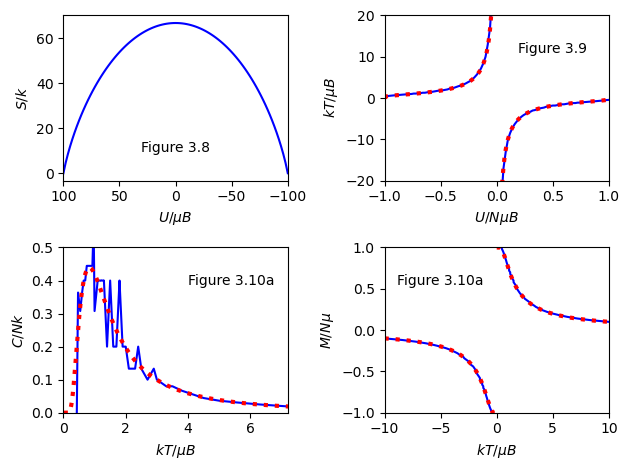

In [16]:
fig, axs = plt.subplots(2, 2)

axs[0,0].plot(U_over_muB_array, S_over_k_array, color='blue')
axs[0,0].set_xlabel(r'$U/\mu B$')
axs[0,0].set_ylabel(r'$S/k$')
axs[0,0].set_xlim(U_over_muB_array[0], U_over_muB_array[-1])
axs[0,0].text(0.5, 0.2, 'Figure 3.8', horizontalalignment='center',
     verticalalignment='center', transform=axs[0,0].transAxes)

U_over_muBN_exact1 = np.arange(-1, 0, .01)
kT_over_muB_exact_array1 = kT_over_muB_exact(N_para*U_over_muBN_exact1, N_para)
U_over_muBN_exact2 = np.arange(0, 1, .01)
kT_over_muB_exact_array2 = kT_over_muB_exact(N_para*U_over_muBN_exact2, N_para)
axs[0,1].plot(U_over_muB_array/N_para, kT_over_muB_array, color='blue')
axs[0,1].plot(U_over_muBN_exact1, kT_over_muB_exact_array1, color='red', ls=':', lw=3)
axs[0,1].plot(U_over_muBN_exact2, kT_over_muB_exact_array2, color='red', ls=':', lw=3)
axs[0,1].set_xlabel(r'$U/N \mu B$')
axs[0,1].set_ylabel(r'$kT / \mu B$')
axs[0,1].set_xlim(-1, 1)
axs[0,1].set_ylim(-20, 20)
axs[0,1].text(0.75, 0.8, 'Figure 3.9', horizontalalignment='center',
     verticalalignment='center', transform=axs[0,1].transAxes)

kT_over_muB_CB_array = np.arange(0.01, 8, .01)
CB_over_Nk_exact_array = CB_over_Nk_exact(kT_over_muB_CB_array)
axs[1,0].plot(kT_over_muB_array, C_over_Nk_array, color='blue')
axs[1,0].plot(kT_over_muB_CB_array, CB_over_Nk_exact_array, color='red', ls=':', lw=3)
axs[1,0].set_xlabel(r'$kT / \mu B$')
axs[1,0].set_ylabel(r'$C/N k$')
axs[1,0].set_xlim(0, 7.2)
axs[1,0].set_ylim(0, 0.5)
axs[1,0].text(0.75, 0.8, 'Figure 3.10a', horizontalalignment='center',
     verticalalignment='center', transform=axs[1,0].transAxes)

kT_over_muB_M_array1 = np.arange(-12, 0, .01)
M_over_muN_exact_array1 = M_over_muN_exact(kT_over_muB_M_array1)
kT_over_muB_M_array2 = np.arange(0, 12, .01)
M_over_muN_exact_array2 = M_over_muN_exact(kT_over_muB_M_array2)
axs[1,1].plot(kT_over_muB_array, M_over_mu_array, color='blue')
axs[1,1].plot(kT_over_muB_M_array1, M_over_muN_exact_array1, color='red', ls=':', lw=3)
axs[1,1].plot(kT_over_muB_M_array2, M_over_muN_exact_array2, color='red', ls=':', lw=3)
axs[1,1].set_xlabel(r'$kT / \mu B$')
axs[1,1].set_ylabel(r'$M/N \mu$')
axs[1,1].set_xlim(-10, 10)
axs[1,1].set_ylim(-1, 1)
axs[1,1].text(0.25, 0.8, 'Figure 3.10a', horizontalalignment='center',
     verticalalignment='center', transform=axs[1,1].transAxes)


fig.tight_layout();